In [5]:
import csv
import requests
import json
import pandas as pd
import random
import glob
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pylab
import pingouin as pg
import seaborn as sns

In [7]:
#for mac os, often there is ERROR 2, no such file or directory is found. To solve this, the ipynb has to be in this folder and use os.getcwd(). When looping the folder, you need to get the ipynb file outof the loop other wise you will get parsing error.
file_path = os.getcwd()
filename_lst = []
for filename in os.listdir(file_path):
    if os.path.splitext(filename)[1] == '.csv':
        filename_lst.append(filename)
print(len(filename_lst))

1324


In [ ]:
#HYPOTHESIS: the correlation between the MTLD of the stories and the number of comments from the last posted story
file_path = os.getcwd()
corr_num_com_prev_lst = []
for filename in filename_lst:#os.listdir(file_path):
    with open (os.path.join(file_path, filename)) as inp:
        filename_df = pd.read_csv(inp)
        mtld_score = filename_df['mtld']
        num_com_prev = filename_df['Ncomments_lag']
        corr_num_com_prev = pg.corr(mtld_score, num_com_prev)
        corr_num_com_prev_lst.append(corr_num_com_prev)
        print(os.path.basename(filename))
print(corr_num_com_prev_lst)

In [ ]:
#------h2----------- the correlation between the MTLD of the stories and the accumulative number of comments from the previous stories
file_path = os.getcwd()
#filename_lst = os.listdir(file_path)
#filename_lst.sort()
#corr_uniqueness_lst = []
for filename in filename_lst:#os.listdir(file_path):
    with open (os.path.join(file_path, filename)) as inp:
        filename_df = pd.read_csv(inp)
        mtld_score = filename_df['mtld']
        acu_num_com_prev = filename_df['acum_comt']
        corr_acu_num_com_prev = pg.corr(mtld_score, acu_num_com_prev)
        #print(os.path.basename(filename))
        print(corr_acu_num_com_prev)
        #corr_uniqueness_lst.append(corr_uniqueness)
        #print(os.path.basename(filename))

In [ ]:
#-------------
mtld_score = df_append['mtld']
acu_num_auth_comt_prev = df_append['acu_num_auth_comt_prev']
corr = pg.corr(mtld_score, acu_num_auth_comt_prev)
print(corr)

In [ ]:
#------h3-----------the correlation between the MTLD of the stories and the accumulative number of author made comments from the previous stories
file_path = os.getcwd()
for filename in filename_lst:
    with open (os.path.join(file_path, filename)) as inp:
        filename_df = pd.read_csv(inp)
        mtld_score = filename_df['mtld']
        acu_num_auth_comt = filename_df['acu_num_auth_comt']
        corr_acu_num_auth_comt = pg.corr(mtld_score, acu_num_auth_comt)
        #print(os.path.basename(filename))
    print(corr_acu_num_auth_comt)

In [ ]:
#----------h4--------- the correlation between the MTLD of the stories and the accumulative number of distinct user who made comments in the previous stories
file_path = os.getcwd()
for filename in filename_lst:
    with open (os.path.join(file_path, filename)) as inp:
        filename_df = pd.read_csv(inp)
        mtld_score = filename_df['mtld']
        acum_dist_user = filename_df['comsum Distinct Users']
        acum_dist_user = pg.corr(mtld_score, acum_dist_user)
        #print(os.path.basename(filename))
    print(acum_dist_user)

In [8]:
file_path = os.getcwd()
filename_lst = []
for filename in os.listdir(file_path):
    if os.path.splitext(filename)[1] == '.csv':
        filename_lst.append(filename)
#append all files together
df_append = pd.DataFrame()
for filename in filename_lst:
            df_temp = pd.read_csv(filename)
            df_append = df_append.append(df_temp, ignore_index=True)
df_append

,Unnamed: 0,level_0,index,fandom_x,id,Nodes,Edges,Clustering coeff,Reciprocity,Ncomments,...,language,words,mtld,mtld_lead,Num_auth_comt,comsum Distinct Users,acu_num_auth_comt,acu_num_auth_comt_prev,Ncomments_lag,acum_comt
0,1,1,35448,sherlock_holmes,4800551,10,18,0.000000,1.000000,27,...,English,5755.0,131.537719,120.923216,12.960000,35,37.709999,24.749999,55.0,55.0
1,2,2,35377,sherlock_holmes,5011435,17,32,0.000000,1.000000,34,...,English,12628.0,120.923216,121.406840,17.000000,52,54.709999,37.709999,27.0,82.0
2,3,3,35172,sherlock_holmes,5698438,16,28,0.000000,0.928571,45,...,English,58177.0,121.406840,125.155701,18.000000,68,72.709999,54.709999,34.0,116.0
3,4,4,34983,sherlock_holmes,6516736,26,50,0.000000,1.000000,97,...,English,65628.0,125.155701,124.630789,41.710001,94,114.420000,72.709999,45.0,161.0
4,5,5,34630,sherlock_holmes,8549953,11,20,0.000000,1.000000,25,...,English,12120.0,124.630789,125.460492,13.000000,105,127.420000,114.420000,97.0,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25042,9,9,18024,harry_potter,23046370,123,135,0.001218,0.148148,248,...,English,35680.0,80.939045,80.939045,9.920000,729,247.870002,237.950002,248.0,1407.0
25043,10,10,18025,harry_potter,23046370,123,135,0.001218,0.148148,248,...,English,35680.0,80.939045,72.500908,9.920000,852,257.790002,247.870002,248.0,1655.0
25044,11,11,29457,harry_potter,18787027,88,106,0.000000,0.358491,238,...,English,99781.0,72.500908,85.755376,23.800000,940,281.590002,257.790002,248.0,1903.0
25045,12,12,25974,harry_potter,27447679,16,15,0.000000,0.000000,23,...,English,8048.0,85.755376,78.478379,0.000000,955,281.590002,281.590002,238.0,2141.0


In [9]:
df_append.to_csv('updated_fullmeta_ao3_acu.csv')

In [220]:
#again read the dataframe, this time we aim to get the mean MTLD of accumulative comments (author and all)
with open ('updated_fullmeta_ao3_acu.csv') as inp:
    df_test = pd.read_csv(inp)

In [225]:
#--- with the interval of 200, group the number of accumulative comments (all)
df_test = df_test.sort_values('acum_comt')
acum_comt = df_test['acum_comt'].astype(float)
ranges = [0]+list(range(5, int(acum_comt.max()+5), 200))
# convert data to bins
df_test['group'] = pd.cut(acum_comt,
                           bins=ranges,
                           labels=['%s-%s' % (ranges[i], ranges[i+1]) for i in range(len(ranges)-1)]
                          )

In [227]:
result = df_test.groupby('group')['mtld'].mean()
#print the result and manually save it into a csv file 'interval_accumulative_comment_all.csv'

In [260]:
#open the result csv file
with open ('interval_accumulative_comment_all.csv') as inp:
    df = pd.read_csv(inp)
print(df.info())
mtld_score = df['Mean_MTLD']
interval_accumulative_comment_all = df['interval_accumulative_comment_all']
corr = pg.corr(mtld_score, interval_accumulative_comment_all)
print(corr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   interval_accumulative_comment_all  232 non-null    int64  
 1   Mean_MTLD                          171 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.8 KB
None
           n         r           CI95%         p-val      BF10  power
pearson  171 -0.512087  [-0.61, -0.39]  8.134228e-13  1.03e+10    1.0


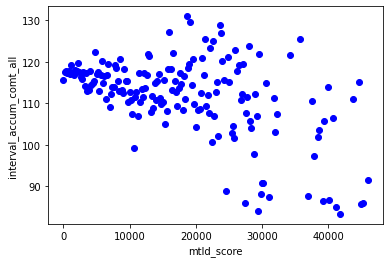

In [261]:
#get the plot
mtld_score = df['Mean_MTLD']
interval_accum_comt_all = df['interval_accumulative_comment_all']
plt.scatter(interval_accum_comt_all, mtld_score, c="b")
plt.xlabel("mtld_score") 
plt.ylabel("interval_accum_comt_all")
plt.show()

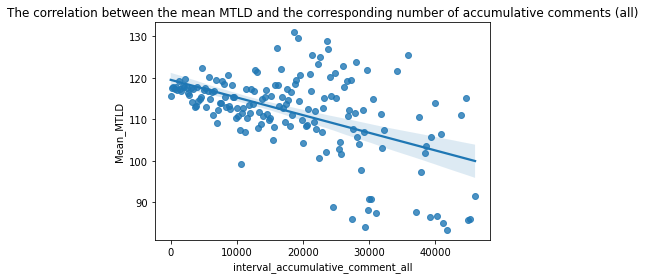

In [263]:
plot_corr_sns = sns.regplot(x="interval_accumulative_comment_all", y="Mean_MTLD", data=df).set(title='The correlation between the mean MTLD and the corresponding number of accumulative comments (all)')
plt.show() 

In [ ]:
#--- with the interval of 200, group the number of accumulative comments (author)
df_test = df_test.sort_values('acum_comt')
acum_comt = df_test['acum_comt'].astype(float)
ranges = [0]+list(range(5, int(acum_comt.max()+5), 200))
# convert data to bins
df_test['group'] = pd.cut(acum_comt,
                           bins=ranges,
                           labels=['%s-%s' % (ranges[i], ranges[i+1]) for i in range(len(ranges)-1)]
                          )
result = df_test.groupby('group')['mtld'].mean()
#print the result and manually save it into a csv file 'interval_author_acu_comt.csv'

In [265]:
#open the result file and calculated the corr
with open ('interval_author_acu_comt.csv') as inp:
    df = pd.read_csv(inp)
print(df.info())
mtld_score = df['Mean_MTLD']
interval_author_acu_comt = df['interval_author_acu_comt']
corr = pg.corr(mtld_score, interval_author_acu_comt)
print(corr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   interval_author_acu_comt  235 non-null    int64  
 1   Mean_MTLD                 171 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.8 KB
None
           n         r           CI95%         p-val      BF10  power
pearson  171 -0.512087  [-0.61, -0.39]  8.134228e-13  1.03e+10    1.0


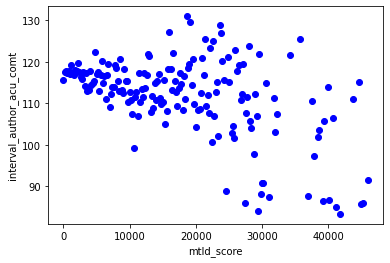

In [266]:
#draw the plot
mtld_score = df['Mean_MTLD']
interval_author_acu_comt = df['interval_author_acu_comt']
plt.scatter(interval_author_acu_comt, mtld_score, c="b")
plt.xlabel("mtld_score") 
plt.ylabel("interval_author_acu_comt")
plt.show()

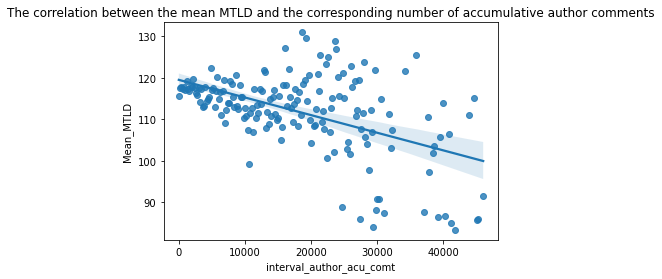

In [267]:
plot_corr_sns = sns.regplot(x="interval_author_acu_comt", y="Mean_MTLD", data=df).set(title='The correlation between the mean MTLD and the corresponding number of accumulative author comments')
plt.show() 

In [20]:
#---------old h3 time--------
import time
file_path = 'ao3_author_df/'
#filename_lst = os.listdir(file_path)
#filename_lst.sort()
#corr_uniqueness_lst = []
for filename in os.listdir(file_path):
    with open (os.path.join(file_path, filename)) as inp:
        filename_df = pd.read_csv(inp)
        mtld_score = filename_df['mtld_lead']
        date_created = filename_df['date_updated'].tolist()
        date_float = []
        for i in date_created:
            date_float.append(time.mktime(time.strptime(i, '%Y-%m')))
        create_date = pd.Series(date_float, index = None)
        corr_date = pg.corr(mtld_score, create_date)
        print(os.path.basename(filename))
        #print(corr_date)
        #corr_uniqueness_lst.append(corr_uniqueness)
        #print(os.path.basename(filename))

BakerTumblings.csv
Unforgotten.csv
debwalsh.csv
MechBull.csv
Leontina.csv
Popcornjones.csv
51stCenturyFox.csv
OracleObscured.csv
fresne.csv
Irrevocably_Sherlocked.csv
Marvelgeek42.csv
somanyfeels.csv
LittleSixx.csv
vaderina.csv
adoctoraday.csv
MapleleafCameo.csv
murdur.csv
Fantasticoncer.csv
scullyseviltwin.csv
CapnWinghead.csv
iriswallpaper.csv
Oudemia.csv
emilyevanston.csv
TheMadKatter13.csv
SenkoWakimarin.csv
Annehiggins.csv
potionpen.csv
elanev91.csv
vain_glorious.csv
distantstarlight.csv
therunawaypen.csv
Moiraine.csv
Inell.csv
nerdwegian.csv
Vulpesmellifera.csv
Rosawyn.csv
27dragons.csv
IHScribe.csv
Quarto.csv
MiladyDragon.csv
Trickster32.csv
Kizmet.csv
boleyn13.csv
melonbutterfly.csv
tweetysrcclt9.csv
EvilDime.csv
meinterrupted.csv
st_mick.csv
OriginalCeenote.csv
FloreatCastellum.csv
jemmasimmmons.csv
ironfamjam.csv
ancientreader.csv
gryffindormischief.csv
Alphinss.csv
captainkilly.csv
Tor_Raptor.csv
ikeracity.csv
SrebrnaFH.csv
betheflame.csv
Crockzilla.csv
agentmoppet.csv
Ellis